# Preprocesamiento y entrenamiento del modelo
TODO: Here we need to define a title and subtitle that define our project entirely.

In [19]:
import pandas as pd 
import os 
import numpy as np

## Understanding the data

In [20]:
%ls ../data/beijing+multi+site+air+quality+data

2A2478DC-8517-4490-9FA7-36F9A7A542BE.JPG*
PRSA2017_Data_20130301-20170228.zip
PRSA_Data_20130301-20170228/
data.csv*
test.csv*


In [21]:
df = pd.read_csv("../data/beijing+multi+site+air+quality+data/data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-02,183.820007,187.300003,183.419998,187.179993,182.199005,17731300
1,2018-07-03,187.789993,187.949997,183.539993,183.919998,179.025772,13954800
2,2018-07-05,185.259995,186.410004,184.279999,185.399994,180.466370,16604200
3,2018-07-06,185.419998,188.429993,185.199997,187.970001,182.967972,17485200
4,2018-07-09,189.500000,190.679993,189.300003,190.580002,185.508545,19756600


In [22]:
df.shape

(503, 7)

In [23]:
df_test = pd.read_csv("../data/beijing+multi+site+air+quality+data/test.csv")
df_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-02,43.060001,45.000000,42.750000,44.980000,44.980000,16703600
1,2018-07-03,45.360001,45.480000,43.799999,43.889999,43.889999,14237500
2,2018-07-05,44.070000,45.110001,43.549999,45.060001,45.060001,16172000
3,2018-07-06,44.910000,46.750000,44.610001,46.650002,46.650002,23740700
4,2018-07-09,46.740002,46.900002,42.080002,44.139999,44.139999,107582400


In [24]:
df.shape

(503, 7)

In [25]:
%ls ../data/beijing+multi+site+air+quality+data/PRSA_Data_20130301-20170228

PRSA_Data_Aotizhongxin_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv
PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [26]:
# cargamos en un array todos los nombres de todos los datasets disponibles
data_sets = os.listdir("../data/beijing+multi+site+air+quality+data/PRSA_Data_20130301-20170228")

## Dimensionalidad de los datos

In [27]:
relative_path  = "../data/beijing+multi+site+air+quality+data/PRSA_Data_20130301-20170228"
for i in data_sets:
    path = os.path.join(relative_path, i)
    df = pd.read_csv(filepath_or_buffer = path)
    print(f"Dataset: {i} --- Shape: {df.shape}")
    print()


Dataset: PRSA_Data_Gucheng_20130301-20170228.csv --- Shape: (35064, 18)



Dataset: PRSA_Data_Huairou_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Tiantan_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Changping_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Guanyuan_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Nongzhanguan_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Wanliu_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Dongsi_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Wanshouxigong_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Aotizhongxin_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Dingling_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Shunyi_20130301-20170228.csv --- Shape: (35064, 18)



In [28]:
def info_datasets(data_sets:list):
    info_data = []

    for idx, dataset in enumerate(data_sets):
        df = pd.read_csv(os.path.join(relative_path, dataset))
        info = {}
        info['DataFrame'] = dataset
        info['Columns'] = df.columns.tolist() 
        info['Dtypes'] = df.dtypes.tolist() 
        info['Rows'] = df.shape[0]
        info_data.append(info)

    info_df = pd.DataFrame(info_data)

    return info_df
df_info = info_datasets(data_sets = data_sets)


for i in df_info.columns:
    df_info[i] = df_info[i].astype('str')
df_info

,DataFrame,Columns,Dtypes,Rows
0,PRSA_Data_Gucheng_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
1,PRSA_Data_Huairou_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
2,PRSA_Data_Tiantan_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
3,PRSA_Data_Changping_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
4,PRSA_Data_Guanyuan_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
5,PRSA_Data_Nongzhanguan_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
6,PRSA_Data_Wanliu_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
7,PRSA_Data_Dongsi_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
8,PRSA_Data_Wanshouxigong_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
9,PRSA_Data_Aotizhongxin_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064


In [29]:
for i in df_info.columns[1:]:
    print(f"Column name: {i}")
    print(f"Uniques values: {df_info[i].unique()}")
    print()

Column name: Columns
Uniques values: ["['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']"]

Column name: Dtypes
Uniques values: ["[dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'), dtype('O')]"]

Column name: Rows
Uniques values: ['35064']



Todo el preprocesamiento, analisis y entrenamiento del modelo se va a hacer respecto a un solo dataset, unir los datasets en este punto es trivial.

In [30]:
# Si quieremos unir los datos debe ser en esta linea
df1 = pd.read_csv(filepath_or_buffer = os.path.join(relative_path, "PRSA_Data_Guanyuan_20130301-20170228.csv"))
df2 = pd.read_csv(filepath_or_buffer = os.path.join(relative_path, "PRSA_Data_Shunyi_20130301-20170228.csv"))
df3 = pd.read_csv(filepath_or_buffer = os.path.join(relative_path, "PRSA_Data_Tiantan_20130301-20170228.csv"))
df4 = pd.read_csv(filepath_or_buffer = os.path.join(relative_path, "PRSA_Data_Changping_20130301-20170228.csv"))
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
140252,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
140253,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
140254,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       140256 non-null  int64  
 1   year     140256 non-null  int64  
 2   month    140256 non-null  int64  
 3   day      140256 non-null  int64  
 4   hour     140256 non-null  int64  
 5   PM2.5    137276 non-null  float64
 6   PM10     138100 non-null  float64
 7   SO2      136740 non-null  float64
 8   NO2      136821 non-null  float64
 9   CO       133678 non-null  float64
 10  O3       136147 non-null  float64
 11  TEMP     140112 non-null  float64
 12  PRES     140115 non-null  float64
 13  DEWP     140109 non-null  float64
 14  RAIN     140114 non-null  float64
 15  wd       139474 non-null  object 
 16  WSPM     140141 non-null  float64
 17  station  140256 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 19.3+ MB


In [32]:
def calculate_aqi_category(row):
    pollutants = {
        'PM2.5': [(0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 350.4, 301, 400), (350.5, 500.4, 401, 500)],
        'PM10': [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300), (425, 504, 301, 400), (505, 604, 401, 500)],
        'SO2': [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150), (186, 304, 151, 200), (305, 604, 201, 300), (605, 804, 301, 400), (805, 1004, 401, 500)],
        'NO2': [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 1649, 301, 400), (1650, 2049, 401, 500)],
        'CO': [(0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), (12.5, 15.4, 151, 200), (15.5, 30.4, 201, 300), (30.5, 40.4, 301, 400), (40.5, 50.4, 401, 500)],
        'O3': [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150), (86, 105, 151, 200), (106, 200, 201, 300), (201, 404, 301, 400), (405, 504, 401, 500), (505, 604, 501, 600)]
    }
    
    aqi = 0
    for pollutant, ranges in pollutants.items():
        concentration = row[pollutant]
        for r in ranges:
            if r[0] <= concentration <= r[1]:
                B_low, B_high, I_low, I_high = r
                aqi = max(aqi, ((I_high - I_low) / (B_high - B_low)) * (concentration - B_low) + I_low)
                break
                
    if aqi <= 100:
        return 'Excellent - Good'
    elif aqi <= 200:
        return 'Slightly - Lightly Polluted'
    elif aqi <= 300:
        return 'Moderately - Heavily Polluted'
    else:
        return 'Severely Polluted'

    
df['AQI'] = df.apply(calculate_aqi_category, axis=1)

In [33]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,Excellent - Good
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,Slightly - Lightly Polluted
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,Excellent - Good
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,Excellent - Good
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,Slightly - Lightly Polluted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping,Excellent - Good
140252,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping,Excellent - Good
140253,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping,Excellent - Good
140254,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping,Slightly - Lightly Polluted


# Preprocesamiento

## Identificacion de columnas importantes

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from sklearn.metrics import classification_report 
from sklearn.preprocessing import LabelEncoder 

La columna station solo se elimina en el caso de un dataset.

In [35]:
columns_to_delete = ['No']
df = df.drop(columns_to_delete, axis = 1)

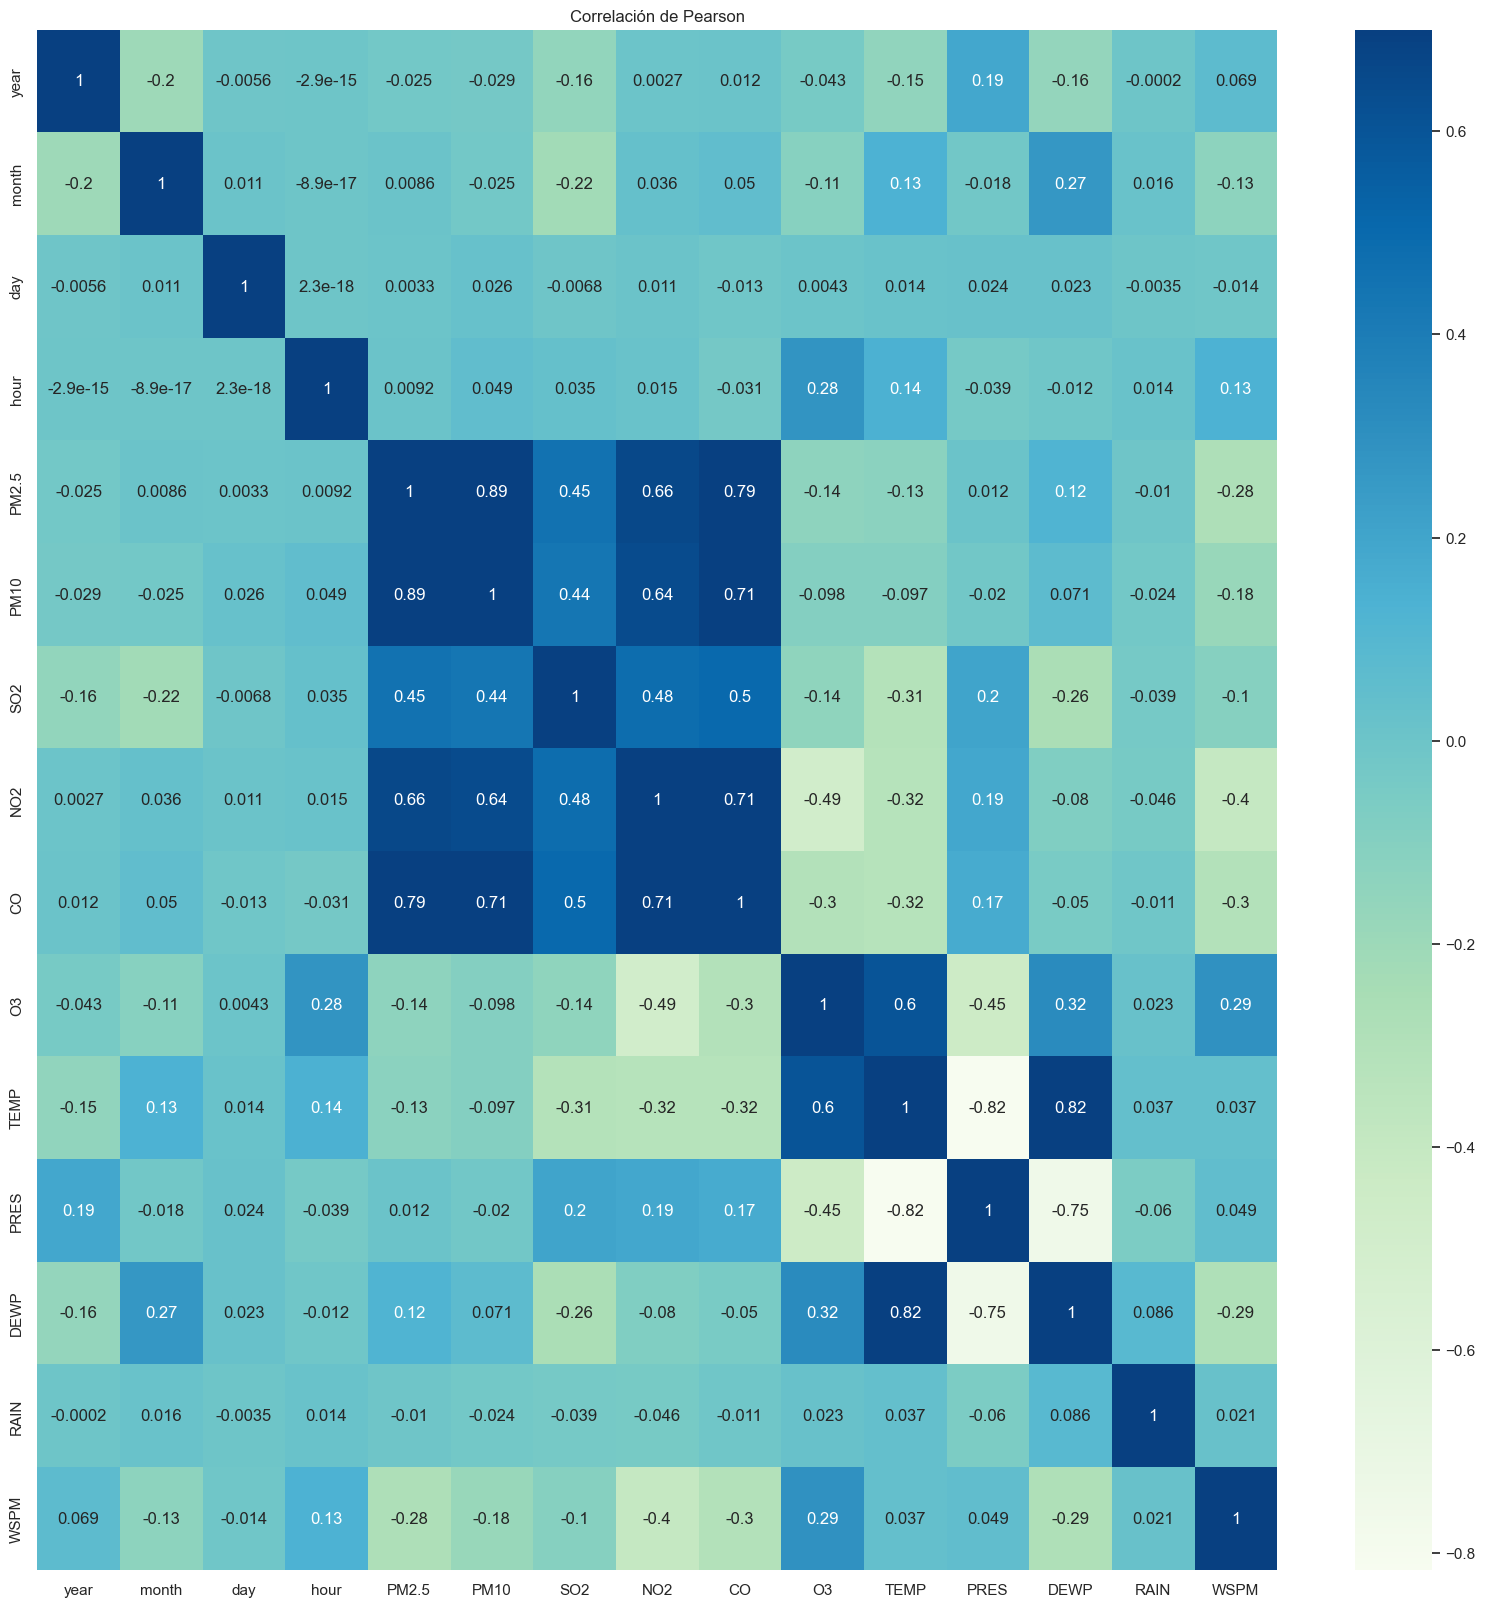

In [36]:
# Selecciona solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Configura Seaborn
sns.set(style='whitegrid', font_scale=1)

# Crea la figura
plt.figure(figsize=(20,20))

# Configura el título
plt.title('Correlación de Pearson')

# Crea el heatmap
sns.heatmap(df_numeric.corr(), vmax=0.7, annot=True, cmap='GnBu')

# Muestra el gráfico
plt.show()

In [37]:
# Selecciona solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Crea una matriz de correlación
corr_matrix = df_numeric.corr().abs()

# Elige un umbral de correlación alto, por ejemplo, 0.8
high_corr_thresh = 0.8

# Crea un conjunto para mantener los nombres de las columnas a eliminar
cols_to_drop = set()

# Itera sobre la matriz de correlación
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > high_corr_thresh:
            colname = corr_matrix.columns[i]  # obtén el nombre de la columna
            cols_to_drop.add(colname)

# Elimina las columnas altamente correlacionadas
df_numeric_dropped = df_numeric.drop(cols_to_drop, axis=1)
df_numeric_dropped

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,RAIN,WSPM
0,2013,3,1,0,4.0,14.0,20.0,300.0,69.0,-0.7,0.0,4.4
1,2013,3,1,1,4.0,13.0,17.0,300.0,72.0,-1.1,0.0,4.7
2,2013,3,1,2,3.0,10.0,19.0,300.0,69.0,-1.1,0.0,5.6
3,2013,3,1,3,3.0,7.0,24.0,400.0,62.0,-1.4,0.0,3.1
4,2013,3,1,4,3.0,5.0,14.0,400.0,71.0,-2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
140251,2017,2,28,19,28.0,4.0,14.0,300.0,NaN,11.7,0.0,1.3
140252,2017,2,28,20,12.0,3.0,23.0,500.0,64.0,10.9,0.0,2.1
140253,2017,2,28,21,7.0,5.0,17.0,500.0,68.0,9.5,0.0,1.5
140254,2017,2,28,22,11.0,3.0,15.0,500.0,72.0,7.8,0.0,1.4


In [38]:
# Select only non-numerical columns from the original df
df_non_numeric = df.select_dtypes(exclude=[np.number])

# Join df_non_numeric with df_numeric_dropped
df_final = df_numeric_dropped.join(df_non_numeric)
df_final

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,wd,station,AQI
0,2013,3,1,0,4.0,14.0,20.0,300.0,69.0,-0.7,0.0,4.4,NNW,Guanyuan,Excellent - Good
1,2013,3,1,1,4.0,13.0,17.0,300.0,72.0,-1.1,0.0,4.7,N,Guanyuan,Slightly - Lightly Polluted
2,2013,3,1,2,3.0,10.0,19.0,300.0,69.0,-1.1,0.0,5.6,NNW,Guanyuan,Excellent - Good
3,2013,3,1,3,3.0,7.0,24.0,400.0,62.0,-1.4,0.0,3.1,NW,Guanyuan,Excellent - Good
4,2013,3,1,4,3.0,5.0,14.0,400.0,71.0,-2.0,0.0,2.0,N,Guanyuan,Slightly - Lightly Polluted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,2017,2,28,19,28.0,4.0,14.0,300.0,NaN,11.7,0.0,1.3,NNE,Changping,Excellent - Good
140252,2017,2,28,20,12.0,3.0,23.0,500.0,64.0,10.9,0.0,2.1,N,Changping,Excellent - Good
140253,2017,2,28,21,7.0,5.0,17.0,500.0,68.0,9.5,0.0,1.5,N,Changping,Excellent - Good
140254,2017,2,28,22,11.0,3.0,15.0,500.0,72.0,7.8,0.0,1.4,NW,Changping,Slightly - Lightly Polluted


In [39]:
df = df_final

## Nulos

In [40]:
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

<Axes: >

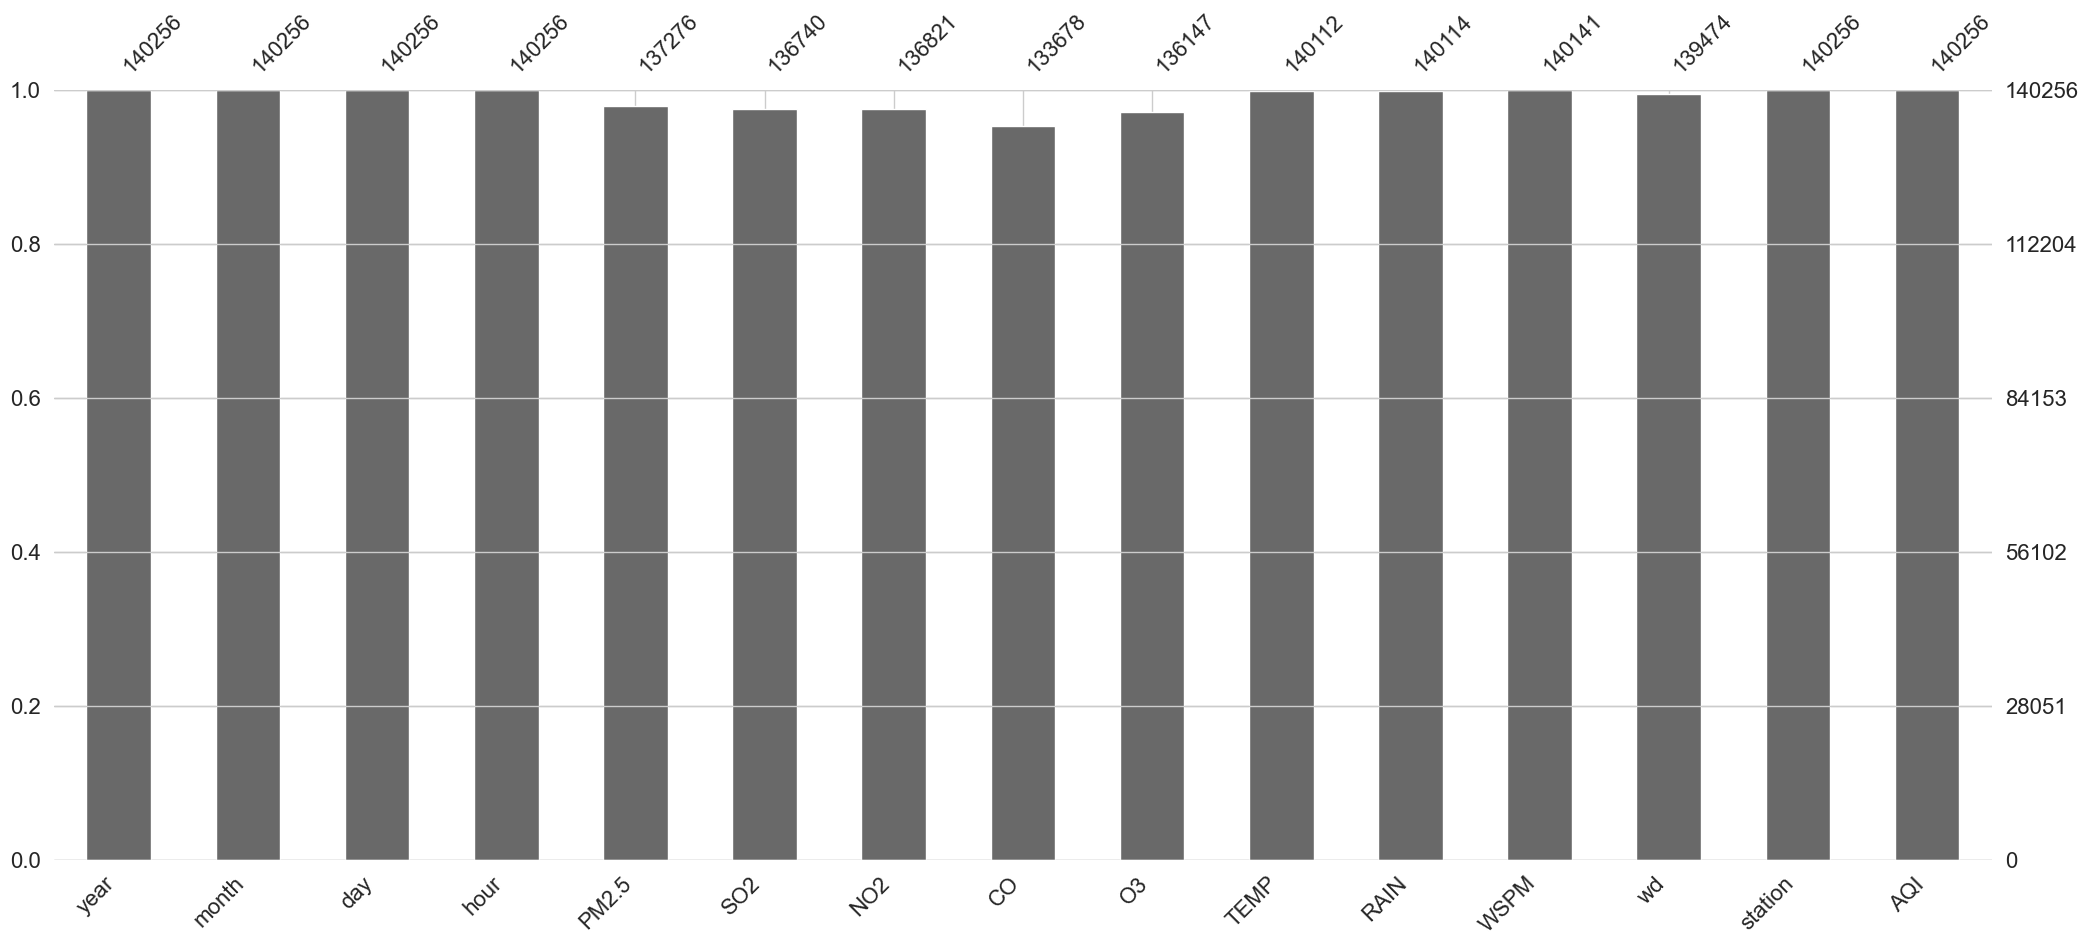

In [41]:
msno.bar(df)

In [42]:
total_rows = df.shape[0]
rows_with_missing = df.isnull().any(axis=1).sum()
missing_row_proportion = (rows_with_missing / total_rows) * 100

print(f"The proportion of rows with at least one missing value is {round(missing_row_proportion,2)}%")
#TODO: Probar si con imputación mejora

The proportion of rows with at least one missing value is 8.71%


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     140256 non-null  int64  
 1   month    140256 non-null  int64  
 2   day      140256 non-null  int64  
 3   hour     140256 non-null  int64  
 4   PM2.5    137276 non-null  float64
 5   SO2      136740 non-null  float64
 6   NO2      136821 non-null  float64
 7   CO       133678 non-null  float64
 8   O3       136147 non-null  float64
 9   TEMP     140112 non-null  float64
 10  RAIN     140114 non-null  float64
 11  WSPM     140141 non-null  float64
 12  wd       139474 non-null  object 
 13  station  140256 non-null  object 
 14  AQI      140256 non-null  object 
dtypes: float64(8), int64(4), object(3)
memory usage: 16.1+ MB


In [44]:
# Copia el DataFrame original
df_filled = df_final.copy()

# Calcula la media de las columnas numéricas
mean_values = df_final.select_dtypes(include=[np.number]).mean()

# Llena los NaN en las columnas numéricas con las medias calculadas
df_filled.loc[:, mean_values.index] = df_final.select_dtypes(include=[np.number]).fillna(mean_values)
df_filled

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,wd,station,AQI
0,2013,3,1,0,4.0,14.0,20.0,300.0,69.000000,-0.7,0.0,4.4,NNW,Guanyuan,Excellent - Good
1,2013,3,1,1,4.0,13.0,17.0,300.0,72.000000,-1.1,0.0,4.7,N,Guanyuan,Slightly - Lightly Polluted
2,2013,3,1,2,3.0,10.0,19.0,300.0,69.000000,-1.1,0.0,5.6,NNW,Guanyuan,Excellent - Good
3,2013,3,1,3,3.0,7.0,24.0,400.0,62.000000,-1.4,0.0,3.1,NW,Guanyuan,Excellent - Good
4,2013,3,1,4,3.0,5.0,14.0,400.0,71.000000,-2.0,0.0,2.0,N,Guanyuan,Slightly - Lightly Polluted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,2017,2,28,19,28.0,4.0,14.0,300.0,56.239104,11.7,0.0,1.3,NNE,Changping,Excellent - Good
140252,2017,2,28,20,12.0,3.0,23.0,500.0,64.000000,10.9,0.0,2.1,N,Changping,Excellent - Good
140253,2017,2,28,21,7.0,5.0,17.0,500.0,68.000000,9.5,0.0,1.5,N,Changping,Excellent - Good
140254,2017,2,28,22,11.0,3.0,15.0,500.0,72.000000,7.8,0.0,1.4,NW,Changping,Slightly - Lightly Polluted


In [45]:
df_filled.isna().sum()

year         0
month        0
day          0
hour         0
PM2.5        0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
RAIN         0
WSPM         0
wd         782
station      0
AQI          0
dtype: int64

In [46]:
# # Calcula la moda de la columna 'wd'
# mode_value = df_filled['wd'].mode()[0]

# # Llena los NaN en la columna 'wd' con la moda
# df_filled['wd'] = df_filled['wd'].fillna(mode_value)
#df_filled = df_filled.drop(['wd'], axis = 1)
df_filled = pd.get_dummies(df_filled, columns=['wd'])

In [47]:
df_filled.isna().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
RAIN       0
WSPM       0
station    0
AQI        0
wd_E       0
wd_ENE     0
wd_ESE     0
wd_N       0
wd_NE      0
wd_NNE     0
wd_NNW     0
wd_NW      0
wd_S       0
wd_SE      0
wd_SSE     0
wd_SSW     0
wd_SW      0
wd_W       0
wd_WNW     0
wd_WSW     0
dtype: int64

In [48]:
df = df_filled.copy()

In [49]:
df.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'SO2', 'NO2', 'CO', 'O3',
       'TEMP', 'RAIN', 'WSPM', 'station', 'AQI', 'wd_E', 'wd_ENE', 'wd_ESE',
       'wd_N', 'wd_NE', 'wd_NNE', 'wd_NNW', 'wd_NW', 'wd_S', 'wd_SE', 'wd_SSE',
       'wd_SSW', 'wd_SW', 'wd_W', 'wd_WNW', 'wd_WSW'],
      dtype='object')

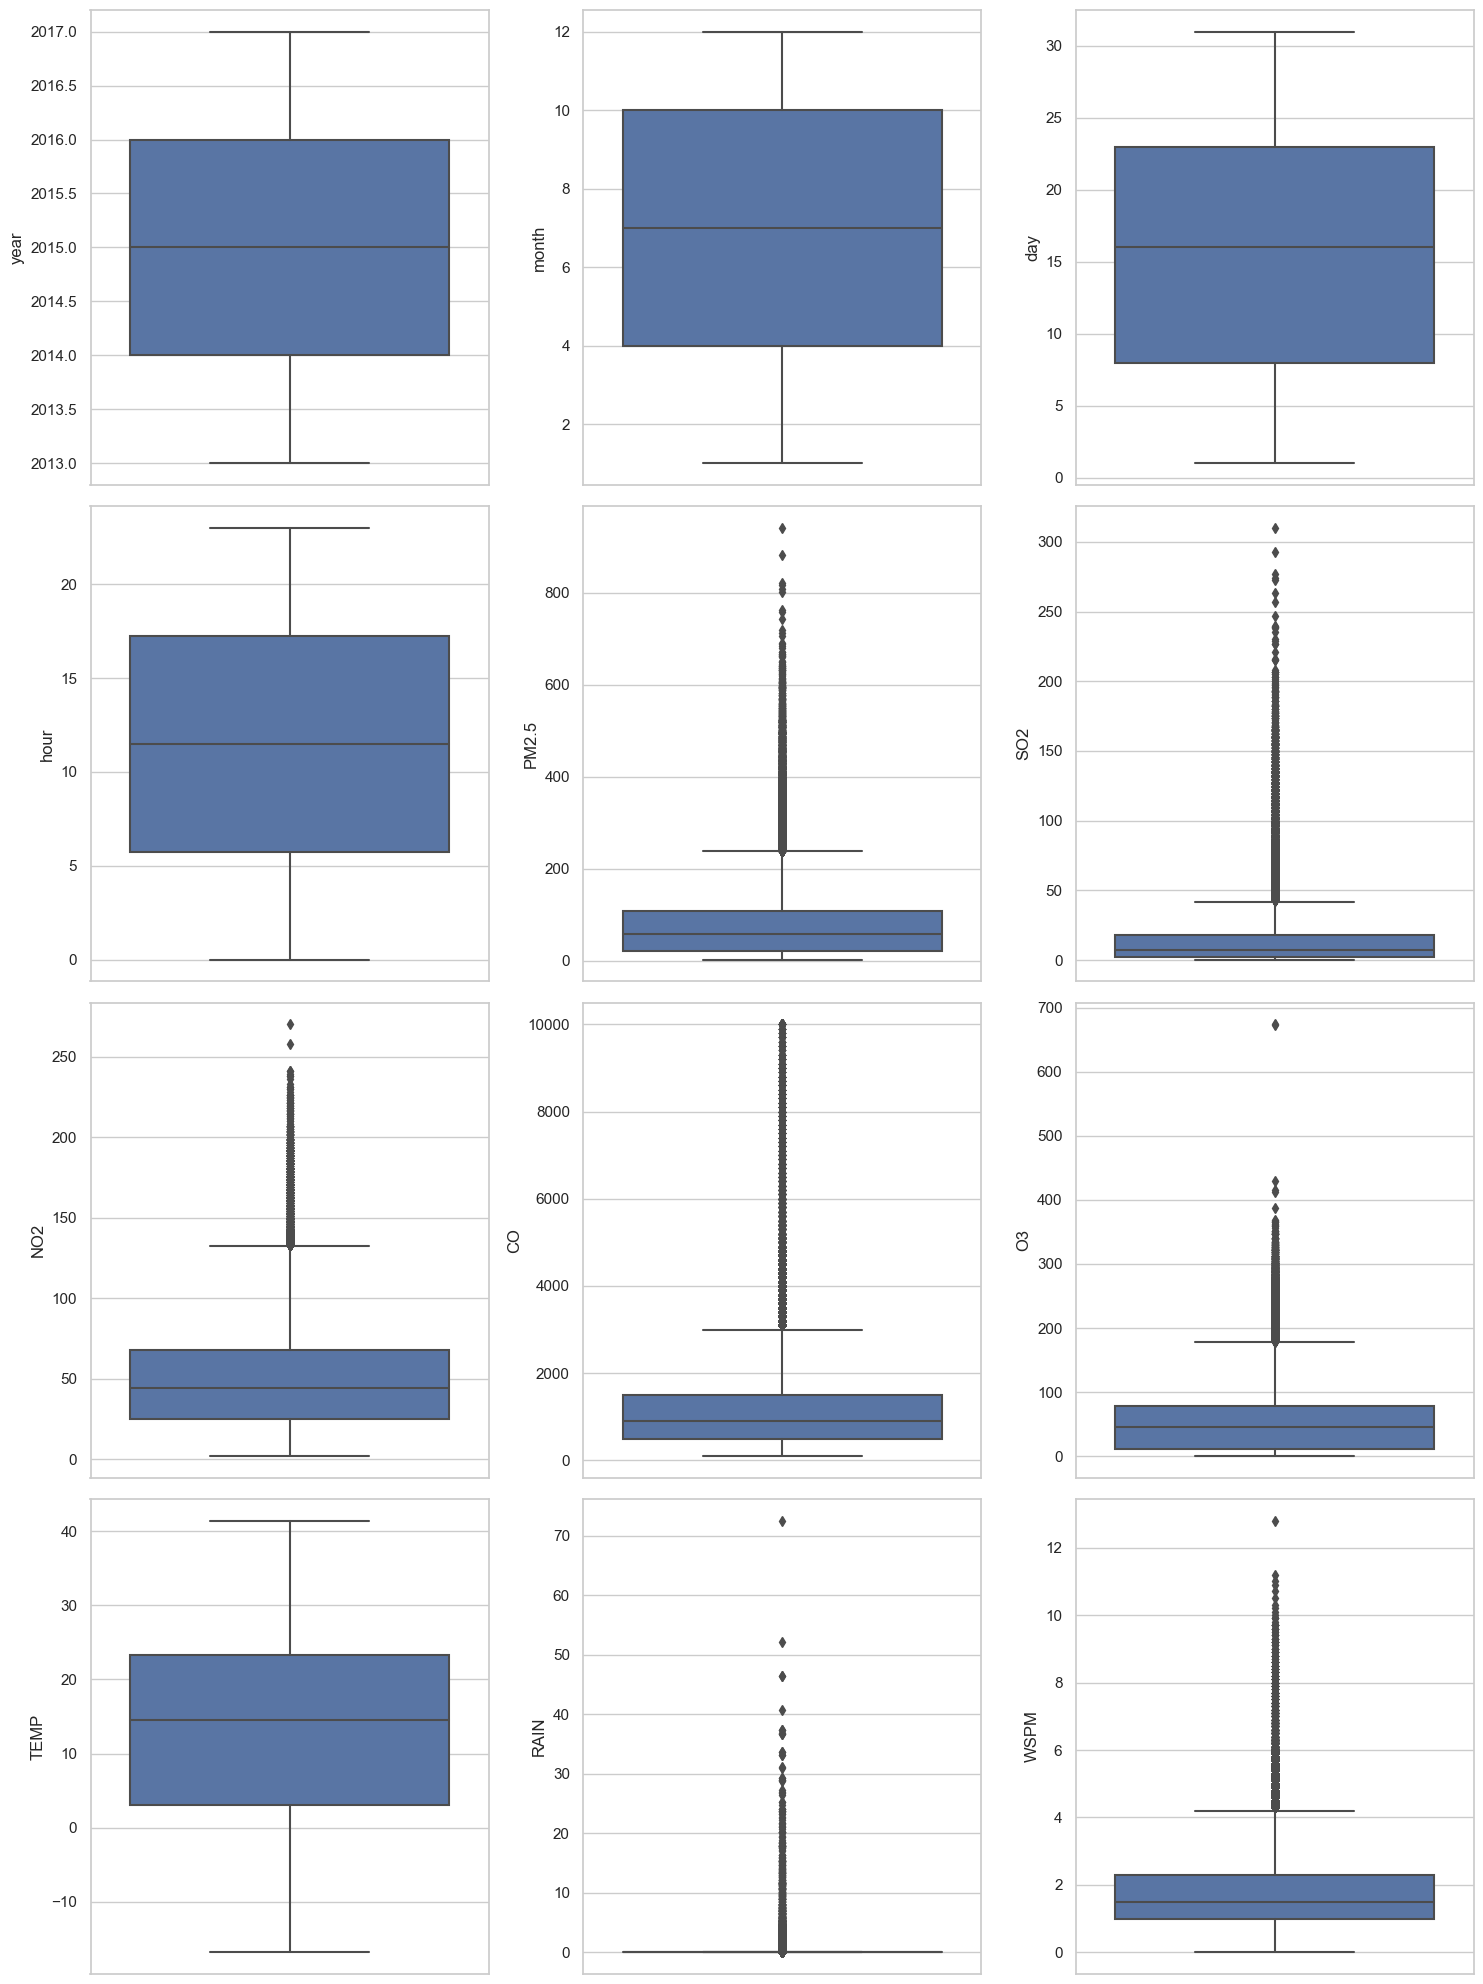

In [50]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

num_plots = len(numeric_cols)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(15, 5 * num_rows))

for i, col_name in enumerate(numeric_cols):
  plt.subplot(num_rows, num_cols, i+1)
  sns.boxplot(y=col_name, data=df)

plt.tight_layout()
plt.show()


In [51]:
c = df.select_dtypes(include=[np.number]).columns
for i in c:
  q1 = df[i].quantile(0.05) #valor 0.05 Este se prueba con distintos valores, hasta que los valores atípicos se eliminen
  q4 = df[i].quantile(0.95) #valor 0.95
  df[i][df[i]<= q1] = q1
  df[i][df[i]>= q4] = q4

/var/folders/j2/h8gpkp8n2hj612m9fs4ww7cw0000gn/T/ipykernel_15634/3890211451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<= q1] = q1
/var/folders/j2/h8gpkp8n2hj612m9fs4ww7cw0000gn/T/ipykernel_15634/3890211451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>= q4] = q4
/var/folders/j2/h8gpkp8n2hj612m9fs4ww7cw0000gn/T/ipykernel_15634/3890211451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[

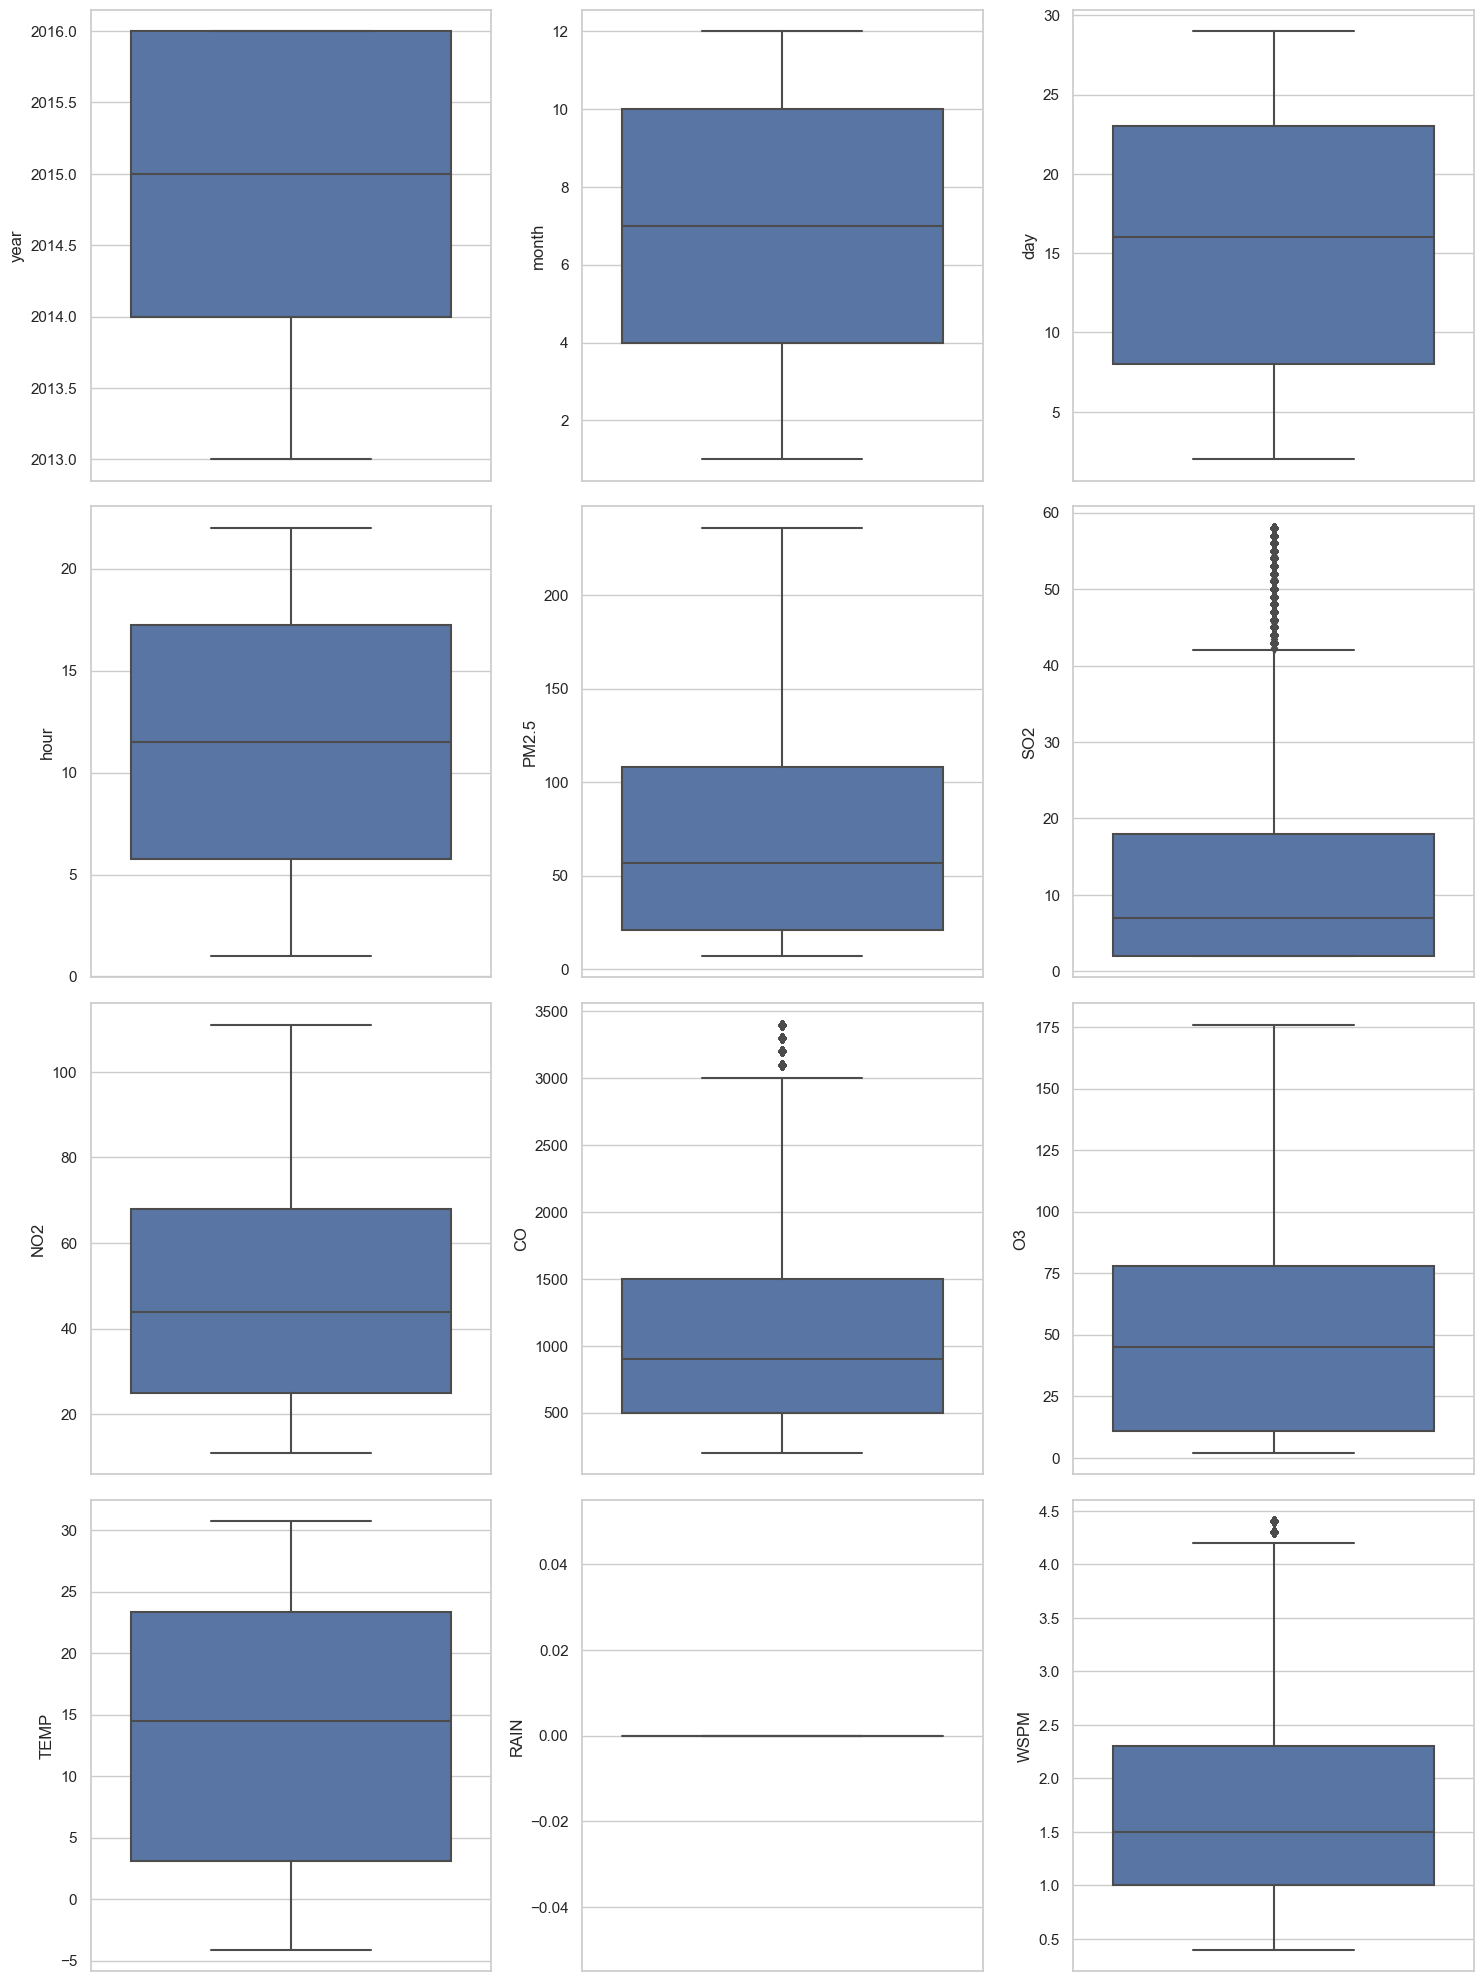

In [52]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

num_plots = len(numeric_cols)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(15, 5 * num_rows))

for i, col_name in enumerate(numeric_cols):
  plt.subplot(num_rows, num_cols, i+1)
  sns.boxplot(y=col_name, data=df)

plt.tight_layout()
plt.show()

In [53]:
df['AQI'].value_counts()
# se debe hacer balanceo de datos.

AQI
Slightly - Lightly Polluted      63356
Excellent - Good                 37784
Moderately - Heavily Polluted    28803
Severely Polluted                10313
Name: count, dtype: int64

Seria importante balancear

In [54]:
df['AQI'].unique()

array(['Excellent - Good', 'Slightly - Lightly Polluted',
       'Moderately - Heavily Polluted', 'Severely Polluted'], dtype=object)

In [55]:
df

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,2013,3,2,1,7.0,14.0,20.0,300.0,69.000000,-0.7,...,True,False,False,False,False,False,False,False,False,False
1,2013,3,2,1,7.0,13.0,17.0,300.0,72.000000,-1.1,...,False,False,False,False,False,False,False,False,False,False
2,2013,3,2,2,7.0,10.0,19.0,300.0,69.000000,-1.1,...,True,False,False,False,False,False,False,False,False,False
3,2013,3,2,3,7.0,7.0,24.0,400.0,62.000000,-1.4,...,False,True,False,False,False,False,False,False,False,False
4,2013,3,2,4,7.0,5.0,14.0,400.0,71.000000,-2.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,2016,2,28,19,28.0,4.0,14.0,300.0,56.239104,11.7,...,False,False,False,False,False,False,False,False,False,False
140252,2016,2,28,20,12.0,3.0,23.0,500.0,64.000000,10.9,...,False,False,False,False,False,False,False,False,False,False
140253,2016,2,28,21,7.0,5.0,17.0,500.0,68.000000,9.5,...,False,False,False,False,False,False,False,False,False,False
140254,2016,2,28,22,11.0,3.0,15.0,500.0,72.000000,7.8,...,False,True,False,False,False,False,False,False,False,False


In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from sklearn.metrics import classification_report 

In [57]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'wd' column
#df['wd'] = le.fit_transform(df['wd'])
df['station'] = le.fit_transform(df['station'])
df['AQI'] = le.fit_transform(df['AQI'])
df

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,2013,3,2,1,7.0,14.0,20.0,300.0,69.000000,-0.7,...,True,False,False,False,False,False,False,False,False,False
1,2013,3,2,1,7.0,13.0,17.0,300.0,72.000000,-1.1,...,False,False,False,False,False,False,False,False,False,False
2,2013,3,2,2,7.0,10.0,19.0,300.0,69.000000,-1.1,...,True,False,False,False,False,False,False,False,False,False
3,2013,3,2,3,7.0,7.0,24.0,400.0,62.000000,-1.4,...,False,True,False,False,False,False,False,False,False,False
4,2013,3,2,4,7.0,5.0,14.0,400.0,71.000000,-2.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,2016,2,28,19,28.0,4.0,14.0,300.0,56.239104,11.7,...,False,False,False,False,False,False,False,False,False,False
140252,2016,2,28,20,12.0,3.0,23.0,500.0,64.000000,10.9,...,False,False,False,False,False,False,False,False,False,False
140253,2016,2,28,21,7.0,5.0,17.0,500.0,68.000000,9.5,...,False,False,False,False,False,False,False,False,False,False
140254,2016,2,28,22,11.0,3.0,15.0,500.0,72.000000,7.8,...,False,True,False,False,False,False,False,False,False,False


In [58]:
from imblearn.over_sampling import RandomOverSampler


# Separate features (X) and labels (y)
X = df.drop('AQI', axis=1)
y = df['AQI']

ros = RandomOverSampler()
X, y = ros.fit_resample(X,y)
y.value_counts()

AQI
0    63356
3    63356
1    63356
2    63356
Name: count, dtype: int64

In [59]:
df_balanced = pd.concat([pd.DataFrame(X, columns=X.columns), pd.DataFrame(y, columns=['AQI'])], axis=1)

# Verify the class frequencies in the balanced DataFrame
class_counts = df_balanced['AQI'].value_counts()
print(class_counts)

AQI
0    63356
3    63356
1    63356
2    63356
Name: count, dtype: int64


In [60]:
df = df_balanced

In [61]:
df.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'SO2', 'NO2', 'CO', 'O3',
       'TEMP', 'RAIN', 'WSPM', 'station', 'wd_E', 'wd_ENE', 'wd_ESE', 'wd_N',
       'wd_NE', 'wd_NNE', 'wd_NNW', 'wd_NW', 'wd_S', 'wd_SE', 'wd_SSE',
       'wd_SSW', 'wd_SW', 'wd_W', 'wd_WNW', 'wd_WSW', 'AQI'],
      dtype='object')

In [62]:
X = df.drop('AQI', axis = 1)
y = df['AQI']

In [63]:
scaler = MinMaxScaler() 
scaler.fit(X)
X = scaler.transform(X)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123,test_size=0.3)

Accuracy: 99.09%
Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19028
           1       1.00      0.98      0.99     19101
           2       0.98      1.00      0.99     18862
           3       1.00      0.99      0.99     19037

    accuracy                           0.99     76028
   macro avg       0.99      0.99      0.99     76028
weighted avg       0.99      0.99      0.99     76028



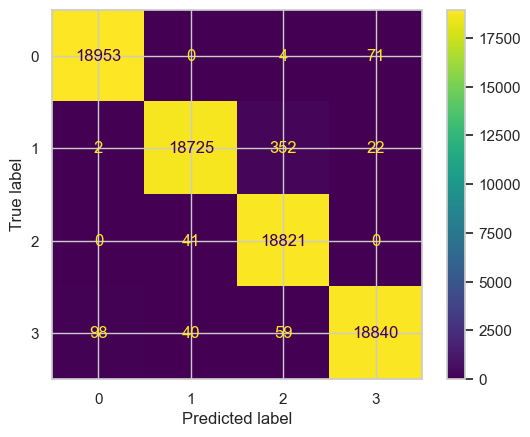

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instantiate the classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Print a classification report
report = classification_report(y_test, y_pred)
print('Classification report:')
print(report)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-validation scores: [0.99019166 0.98928974 0.99036077 0.99007892 0.99024803 0.99126268
 0.99013473 0.99086758 0.98945826 0.98844354]
Average cross-validation score: 0.990033590214823
Accuracy: 99.10%
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19028
           1       1.00      0.98      0.99     19101
           2       0.98      1.00      0.99     18862
           3       1.00      0.99      0.99     19037

    accuracy                           0.99     76028
   macro avg       0.99      0.99      0.99     76028
weighted avg       0.99      0.99      0.99     76028



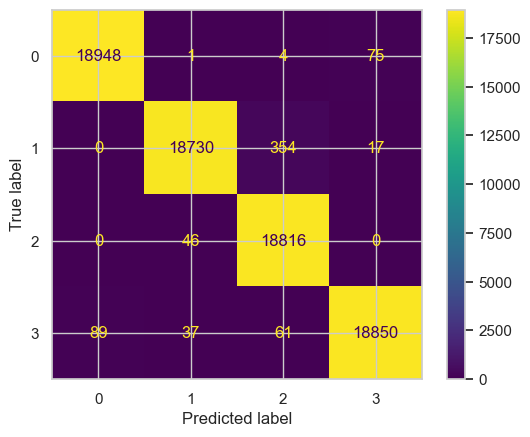

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define the parameter grid for GridSearch
param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Instantiate the classifier
clf = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Display the best parameters
print('Best parameters:', grid_search.best_params_)

# Use the best model
best_clf = grid_search.best_estimator_

# Cross-validate on the best model
cv_scores = cross_val_score(best_clf, X_train, y_train, cv=10)

# Display cross-validation scores
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Print a classification report
report = classification_report(y_test, y_pred)
print('Classification report:')
print(report)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(best_clf, X_test, y_test)
plt.show()


Accuracy: 95.74%
Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19028
           1       0.98      0.89      0.93     19101
           2       0.90      0.97      0.93     18862
           3       0.98      0.97      0.98     19037

    accuracy                           0.96     76028
   macro avg       0.96      0.96      0.96     76028
weighted avg       0.96      0.96      0.96     76028



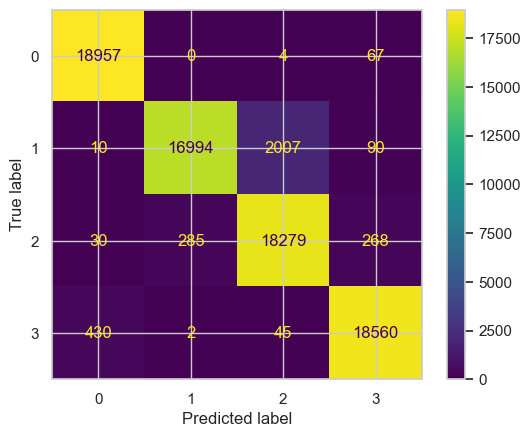

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define the best parameters
best_params =  {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 10}

# Instantiate the classifier with the best parameters
clf = DecisionTreeClassifier(**best_params)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Print a classification report
report = classification_report(y_test, y_pred)
print('Classification report:')
print(report)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()


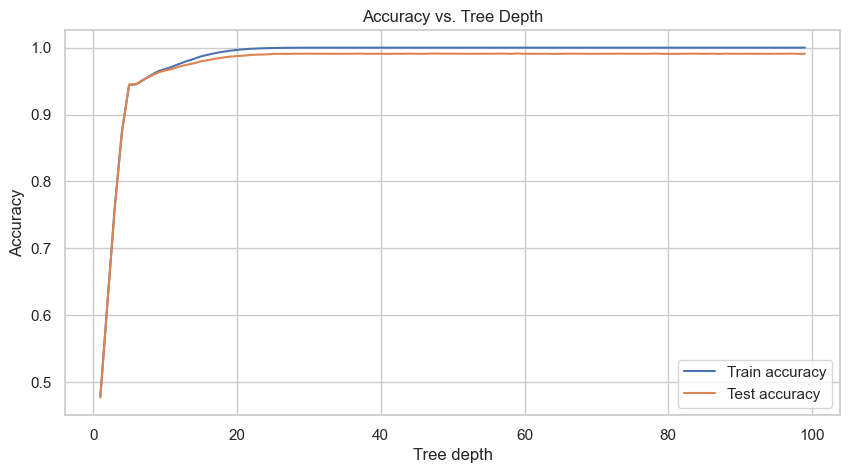

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Lists to store accuracy values
train_acc = []
test_acc = []

# Range of tree depths to try
depths = list(range(1, 100))

# Fit a decision tree for each depth value
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(depths, train_acc, label='Train accuracy')
plt.plot(depths, test_acc, label='Test accuracy')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Tree Depth')
plt.show()
